In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [19]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

In [20]:
X[0]

array([2.51771042])

Text(0, 0.5, 'y')

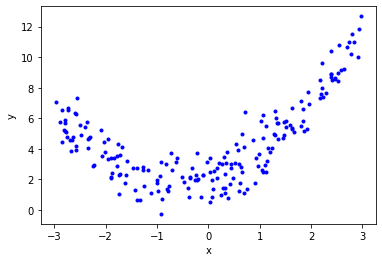

In [21]:
plt.plot(X,y,"b.")
plt.xlabel("x")
plt.ylabel("y")

In [22]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
# Applying linear regression
lr = LinearRegression()

In [24]:
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.21212062278810828

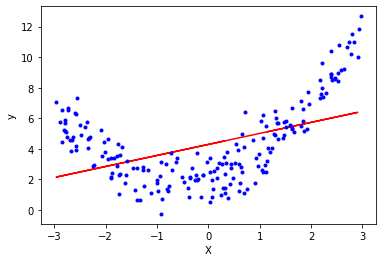

In [26]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [27]:
poly=PolynomialFeatures(degree=2)
x_train_trans=poly.fit_transform(X_train)
x_test_trans=poly.transform(X_test)

In [28]:
print(X_train[0])

[0.31415794]


In [29]:
print(x_train_trans[0])

[1.         0.31415794 0.09869521]


In [30]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_train_trans=poly.fit_transform(X_train)
x_test_trans=poly.transform(X_test)

In [31]:
print(X_train[0])

[0.31415794]


In [32]:
print(x_train_trans[0])

[0.31415794 0.09869521]


In [13]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(x_test_trans)
r2_score(y_test,y_pred)

0.6699353708506182

In [15]:
lr.coef_,lr.intercept_

(array([[ 0.00000000e+00, -1.35442419e+00, -1.50902465e-01,
          9.44101997e+00, -2.37091978e+00, -1.31962334e+01,
          8.61412638e+00,  9.19256802e+00, -8.69436025e+00,
         -3.69684632e+00,  4.28557934e+00,  9.10861442e-01,
         -1.19609421e+00, -1.39176360e-01,  1.98746872e-01,
          1.28203243e-02, -1.95087557e-02, -6.50316780e-04,
          1.04551401e-03,  1.39205244e-05, -2.36057696e-05]]),
 array([2.1311943]))

In [16]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

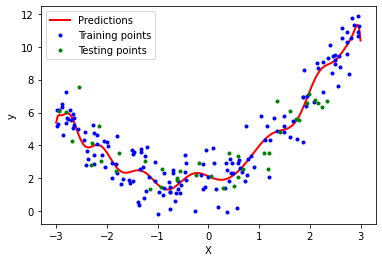

In [17]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()